# TASK 1: Unsupervised learning 

In this problem, I will implement a Kmeans custering algorithm using iris dataset and scikit learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print("\nFeature names:", iris_data['feature_names'])
print("\nTarget names:", iris_data['target_names'])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


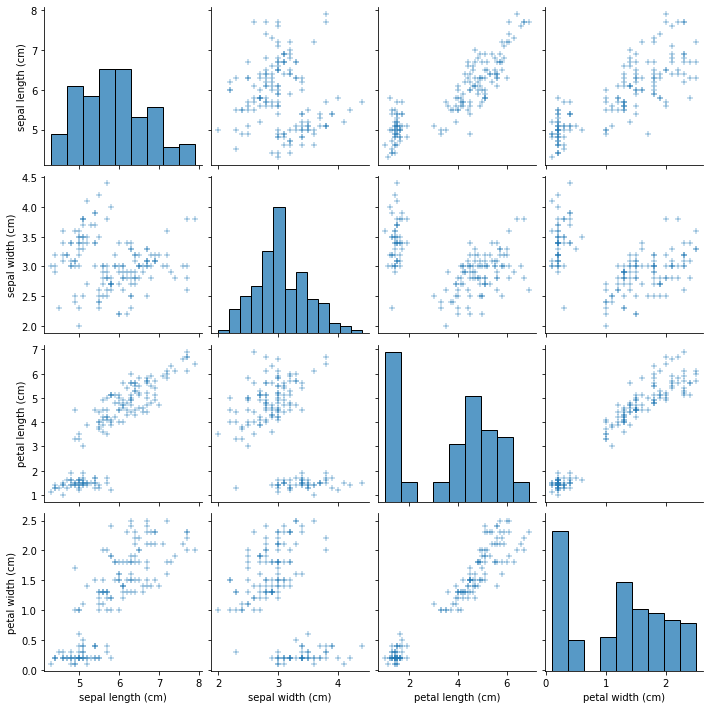

In [8]:
sns.pairplot(df, markers='+')
plt.show()

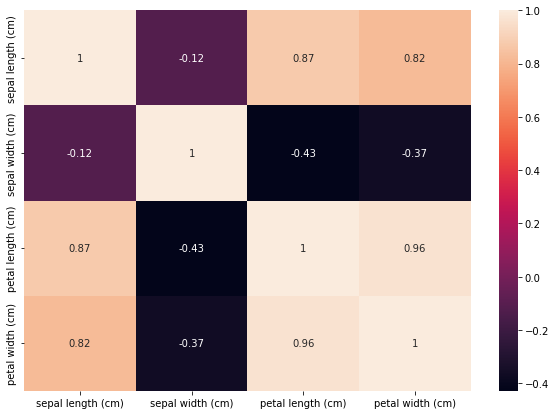

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

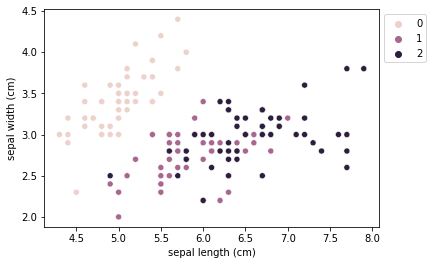

In [34]:

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
				hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()
   

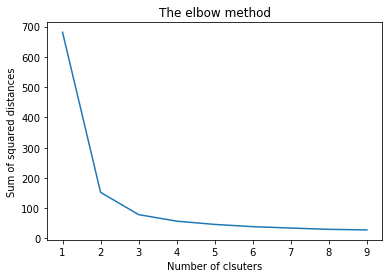

In [11]:
wss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wss)
plt.title('The elbow method')
plt.xlabel('Number of clsuters')
plt.ylabel('Sum of squared distances')
plt.show()

In [12]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.6810461692117462
For cluster: 3, the silhouette score is: 0.5528190123564095
For cluster: 4, the silhouette score is: 0.49721766487109753
For cluster: 5, the silhouette score is: 0.48874888709310566
For cluster: 6, the silhouette score is: 0.36483400396700255
For cluster: 7, the silhouette score is: 0.3566882476581695
For cluster: 8, the silhouette score is: 0.3464399437280938
For cluster: 9, the silhouette score is: 0.3188006466806413


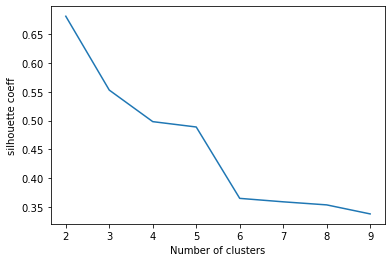

In [13]:
silouette_coeff = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silouette_coeff.append(score)
    
plt.plot(range(2,10), silouette_coeff)
plt.xticks(range(2,10))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette coeff")
plt.show()

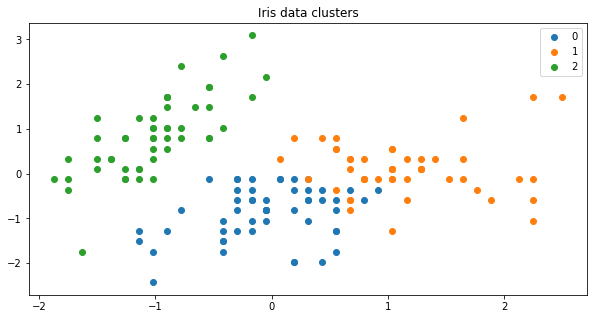

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)
plt.figure(figsize=(10,5))
for i in unique_labels:
    plt.scatter(X[y==i, 0], X[y==i, 1], label=i)
plt.title("Iris data clusters")
plt.legend()
plt.show()

# Task2 : Regression :

In this problem I will implement a regression  model using scikit learn and iris datset.

In [15]:
#Import libraries

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# load the dataset
iris= load_iris()

In [16]:
# creating pd dataframes
iris_df = pd.DataFrame(data= iris.data, columns = iris.feature_names)
target_df = pd.DataFrame(data= iris.target,columns = ['species'])
def converter(specie):
    if specie == 0:
        return'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)  

#concatenate the dataframes
iris_df = pd.concat([iris_df,target_df],axis=1)
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


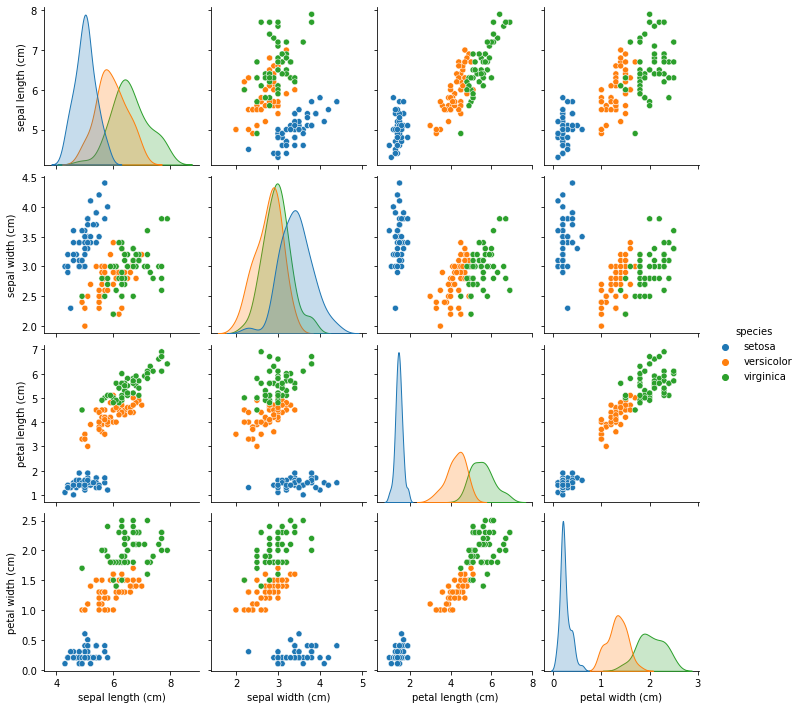

In [18]:
sns.pairplot(iris_df,hue='species')

In [21]:
#converting objects to numerical dtype
iris_df.drop('species',axis=1,inplace=True)
target_df  = pd.DataFrame(columns =['species'],data = iris.target)
iris_df = pd.concat([iris_df,target_df],axis=1)
#variables
x= iris_df.drop(labels = 'sepal length (cm)',axis= 1)
y= iris_df['sepal length (cm)']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regression techniques

In [22]:
print("\nRegression Techniques:")


Regression Techniques:


### Linear Regression

In [26]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
print(f"Linear Regression - R-squared: {linear_reg_r2}, RMSE: {linear_reg_rmse}")


Linear Regression - R-squared: 1.0, RMSE: 9.315293853352739e-16


### Decision Tree Regression

In [27]:
# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_pred = decision_tree_reg.predict(X_test)
decision_tree_reg_r2 = r2_score(y_test, decision_tree_reg_pred)
decision_tree_reg_rmse = mean_squared_error(y_test, decision_tree_reg_pred, squared=False)
print(f"Decision Tree Regression - R-squared: {decision_tree_reg_r2}, RMSE: {decision_tree_reg_rmse}")

Decision Tree Regression - R-squared: 0.9917906123237397, RMSE: 0.07527726527090811


 ### Random Forest Regression

In [28]:
# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_reg_pred = random_forest_reg.predict(X_test)
random_forest_reg_r2 = r2_score(y_test, random_forest_reg_pred)
random_forest_reg_rmse = mean_squared_error(y_test, random_forest_reg_pred, squared=False)
print(f"Random Forest Regression - R-squared: {random_forest_reg_r2}, RMSE: {random_forest_reg_rmse}")


Random Forest Regression - R-squared: 0.9955157909986481, RMSE: 0.0556354203722758





# Task 3 :  Classification

In [4]:
# load the dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['Species'] = iris_data.target

# Display dataset information
print("Feature names:", iris_data.feature_names)
print("Target names:", iris_data.target_names)

# Split the data into features and target variable
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


### 1- Logistic Regression
### 2- Random Forest Classifier
### 3- Gradient Boosting Classifier

In [5]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)

# Random Forest Classifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
random_forest_pred = random_forest_clf.predict(X_test)

# Gradient Boosting Classifier
gradient_boosting_clf = GradientBoostingClassifier()
gradient_boosting_clf.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_clf.predict(X_test)

# Evaluation metrics
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

print_metrics(y_test, logistic_reg_pred, "Logistic Regression")
print_metrics(y_test, random_forest_pred, "Random Forest Classifier")
print_metrics(y_test, gradient_boosting_pred, "Gradient Boosting Classifier")




Logistic Regression Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Random Forest Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Gradient Boosting Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000



In [8]:
# Comparing predicted values with original values
def compare_predictions(y_true, y_pred, model_name):
    comparison_df = pd.DataFrame({'True Values': y_true, 'Predicted Values': y_pred})
    print(f"Comparison for {model_name}:")
    print(comparison_df.head(5))  # Displaying the first 10 entries for comparison

# Comparing for Logistic Regression
compare_predictions(y_test, logistic_reg_pred, "Logistic Regression")

Comparison for Logistic Regression:
     True Values  Predicted Values
73             1                 1
18             0                 0
118            2                 2
78             1                 1
76             1                 1


In [9]:
#Comparing for Random Forest Classifier
compare_predictions(y_test, random_forest_pred, "Random Forest Classifier")


Comparison for Random Forest Classifier:
     True Values  Predicted Values
73             1                 1
18             0                 0
118            2                 2
78             1                 1
76             1                 1


In [10]:
# Comparing for Gradient Boosting Classifier
compare_predictions(y_test, gradient_boosting_pred, "Gradient Boosting Classifier")

Comparison for Gradient Boosting Classifier:
     True Values  Predicted Values
73             1                 1
18             0                 0
118            2                 2
78             1                 1
76             1                 1
